In [1]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
import math

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [3]:
barcelona = pd.read_csv('/Users/jyots/Desktop/DSI-SF-4-Jyojha/Capstone_Project/airbnb_DataSets/Airbnb listings in Barcelona (November 2015).csv',
                   encoding='utf8')

In [4]:
barcelona.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14012 entries, 0 to 14011
Data columns (total 16 columns):
Unnamed: 0              14012 non-null int64
room_id                 14012 non-null int64
host_id                 14012 non-null int64
room_type               14004 non-null object
borough                 0 non-null float64
neighborhood            14012 non-null object
reviews                 14012 non-null int64
overall_satisfaction    11311 non-null float64
accommodates            11330 non-null float64
bedrooms                13981 non-null float64
bathrooms               12875 non-null float64
price                   14012 non-null float64
minstay                 12961 non-null float64
latitude                14012 non-null float64
longitude               14012 non-null float64
collected               14012 non-null object
dtypes: float64(9), int64(4), object(3)
memory usage: 1.7+ MB


In [5]:
barcelona.drop('borough', axis=1, inplace=True)

In [6]:
barcelona.neighborhood.unique()

array([u'Ciutat Vella', u'Eixample', u'Sant Mart\ufffd', u'Nou Barris',
       u'Horta-Guinard\ufffd', u'Gr\ufffdcia', u'Sants-Montju\ufffdc',
       u'Sant Andreu', u'Sarri\ufffd-Sant Gervasi', u'Les Corts'], dtype=object)

In [7]:
barcelona.neighborhood.replace(u'Sant Mart\ufffd',u'Sant Marti',inplace=True)
barcelona.neighborhood.replace(u'Horta-Guinard\ufffd',u'Horta-Guinardo',inplace=True)
barcelona.neighborhood.replace(u'Gr\ufffdcia',u'Gracia',inplace=True)
barcelona.neighborhood.replace(u'Sants-Montju\ufffdc',u'Sants-Montjuic',inplace=True)
barcelona.neighborhood.replace(u'Sarri\ufffd-Sant Gervasi',u'Sarria-Sant Gervasi',inplace=True)

In [8]:
barcelona.neighborhood.unique()

array([u'Ciutat Vella', u'Eixample', u'Sant Marti', u'Nou Barris',
       u'Horta-Guinardo', u'Gracia', u'Sants-Montjuic', u'Sant Andreu',
       u'Sarria-Sant Gervasi', u'Les Corts'], dtype=object)

In [9]:
barcelona.head(2)

,Unnamed: 0,room_id,host_id,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,latitude,longitude,collected
0,0,7670,20617,Entire home/apt,Ciutat Vella,119,4.5,2.0,NaN,NaN,55.0,2.0,41.386942,2.183842,2015-11-13 18:58:48.009865
1,1,11194,41161,Private room,Ciutat Vella,63,4.5,2.0,1.0,NaN,39.0,2.0,41.383905,2.181047,2015-11-13 14:04:57.539955


In [10]:
barcelona.room_type.value_counts()

Entire home/apt    7763
Private room       6075
Shared room         166
Name: room_type, dtype: int64

In [11]:
barcelona = barcelona[barcelona['room_type'].notnull()]

In [12]:
custom = lambda x: np.average(x)
df1 = pd.DataFrame(barcelona.groupby('neighborhood').agg({'host_id':'count','reviews':'sum', 'price':custom}))

In [13]:
df1 = df1.reset_index(level = 0)
df1.sort('host_id', ascending=False, inplace=True)

/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


In [14]:
df1

,neighborhood,reviews,host_id,price
1,Eixample,79490,4468,99.515667
0,Ciutat Vella,93672,3498,85.162093
7,Sant Marti,19285,1502,92.859521
2,Gracia,20950,1436,81.194290
8,Sants-Montjuic,26391,1388,72.933718
9,Sarria-Sant Gervasi,5231,600,102.516667
3,Horta-Guinardo,5250,460,68.284783
4,Les Corts,3227,249,72.622490
6,Sant Andreu,2601,232,55.650862
5,Nou Barris,1307,171,48.280702


In [15]:
df1.sort_values('neighborhood',inplace=True)

In [16]:
df1 = df1.reset_index()

In [17]:
df1

,index,neighborhood,reviews,host_id,price
0,0,Ciutat Vella,93672,3498,85.162093
1,1,Eixample,79490,4468,99.515667
2,2,Gracia,20950,1436,81.194290
3,3,Horta-Guinardo,5250,460,68.284783
4,4,Les Corts,3227,249,72.622490
5,5,Nou Barris,1307,171,48.280702
6,6,Sant Andreu,2601,232,55.650862
7,7,Sant Marti,19285,1502,92.859521
8,8,Sants-Montjuic,26391,1388,72.933718
9,9,Sarria-Sant Gervasi,5231,600,102.516667


In [18]:
def standardize(S):
    scaler = preprocessing.StandardScaler().fit(S)
    return scaler.transform(S)

In [19]:
df1.host_id = standardize(df1.host_id)
df1.reviews = standardize(df1.reviews)
df1.price = standardize(df1.price)

/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWar

In [20]:
df1


,index,neighborhood,reviews,host_id,price
0,0,Ciutat Vella,2.142992,1.500234,0.427957
1,1,Eixample,1.695602,2.193991,1.274060
2,2,Gracia,-0.151119,0.025462,0.194066
3,3,Horta-Guinardo,-0.646397,-0.672588,-0.566912
4,4,Les Corts,-0.710215,-0.823498,-0.311217
5,5,Nou Barris,-0.770784,-0.879285,-1.746096
6,6,Sant Andreu,-0.729963,-0.835656,-1.311646
7,7,Sant Marti,-0.203644,0.072666,0.881699
8,8,Sants-Montjuic,0.020524,-0.008869,-0.292871
9,9,Sarria-Sant Gervasi,-0.646996,-0.572458,1.450960


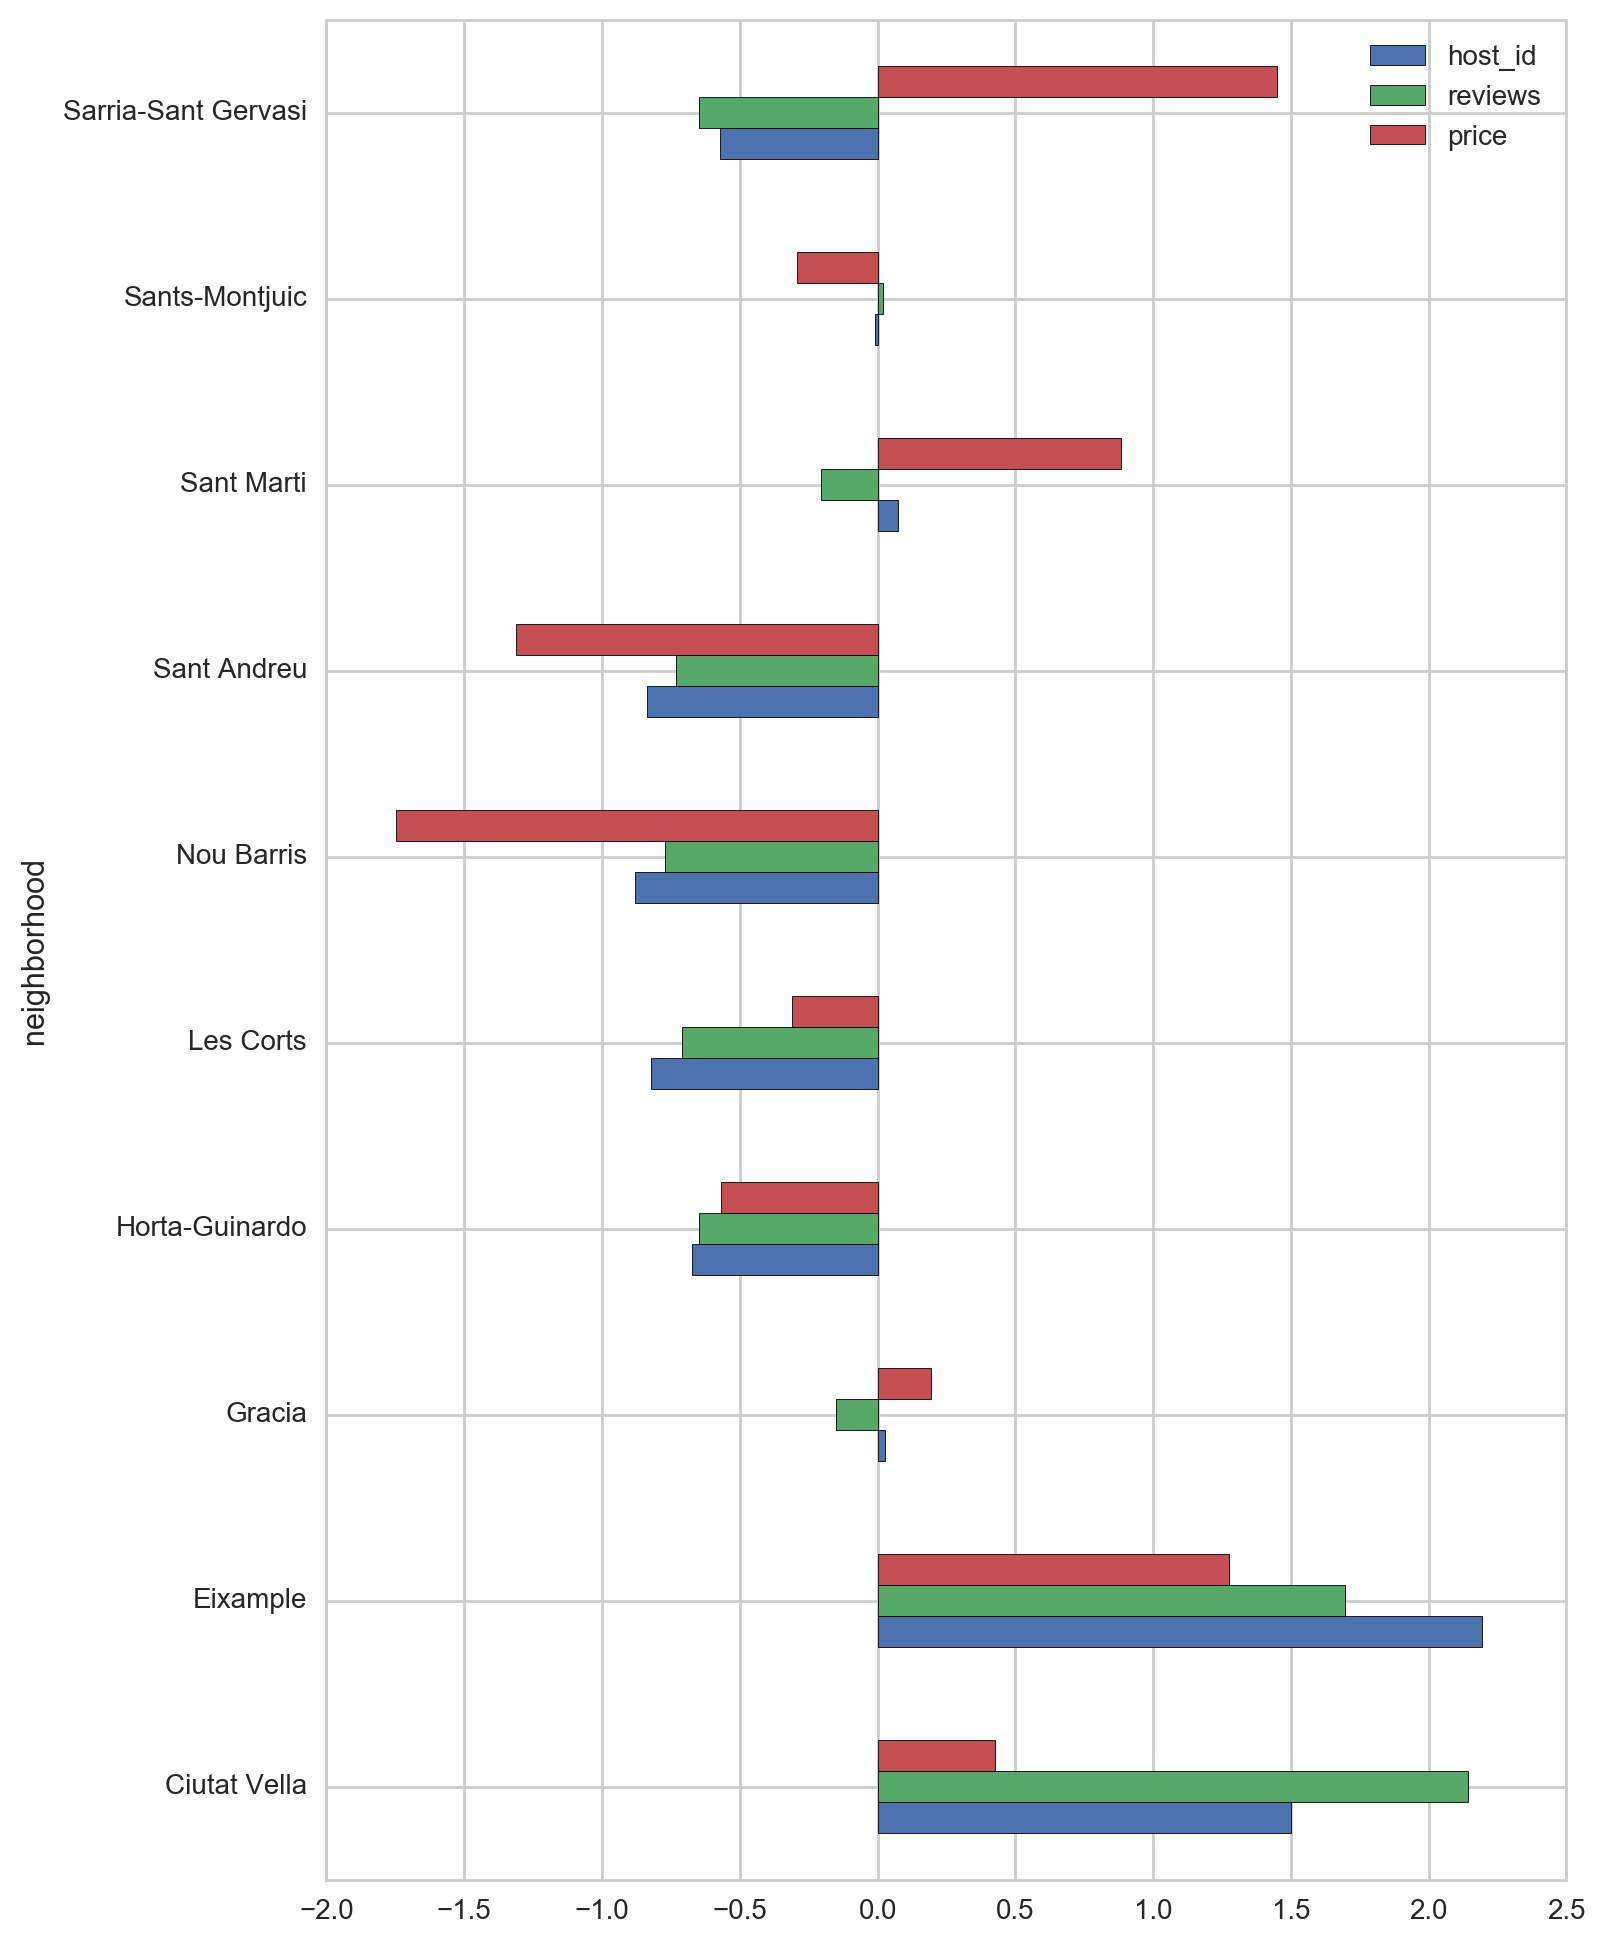

In [21]:
df1.plot(x = 'neighborhood', y = ['host_id','reviews','price'], kind ='barh', figsize =(8, 12))

In [22]:
custom = lambda x: np.average(x)
df2 = pd.DataFrame(barcelona.groupby(['neighborhood','room_type']).agg({'host_id':'count','reviews':'sum', 'price':custom}))

In [23]:
df2.reset_index(level=0, inplace=True)
df2.reset_index(inplace=True)

In [24]:
df2.host_id = standardize(df2.host_id)
df2.reviews = standardize(df2.reviews)
df2.price = standardize(df2.price)
df2.head()

/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either usin

,room_type,neighborhood,reviews,host_id,price
0,Entire home/apt,Ciutat Vella,3.177615,2.325129,1.236542
1,Private room,Ciutat Vella,1.921472,1.445571,-0.417339
2,Shared room,Ciutat Vella,-0.590208,-0.694785,-0.686665
3,Entire home/apt,Eixample,2.692523,3.104122,1.919080
4,Private room,Eixample,1.448754,2.075971,-0.460998


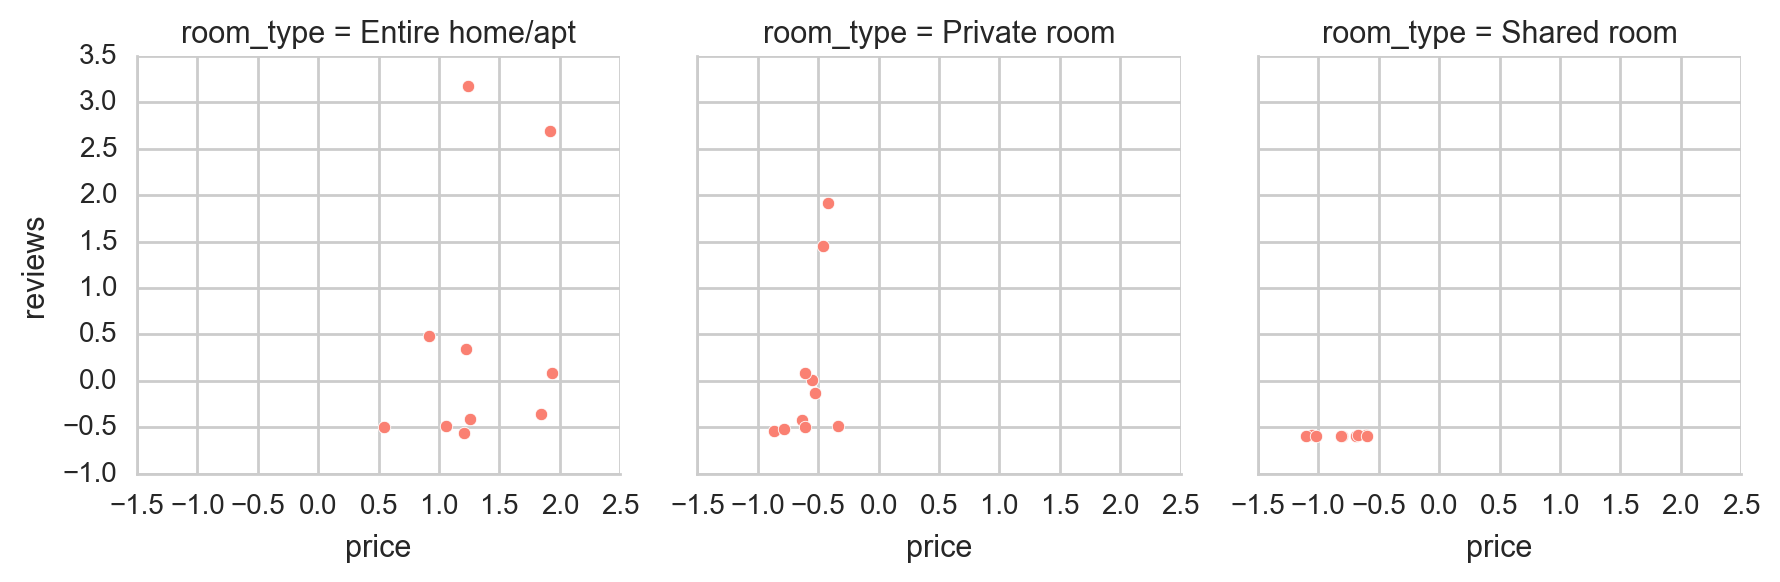

In [25]:
g = sns.FacetGrid(df2, col="room_type")
g = g.map(plt.scatter,"price","reviews", edgecolor="w", color = "salmon")

In [26]:
custom = lambda x: np.average(x)
neighborhood_data = pd.DataFrame(barcelona.groupby('neighborhood').agg({'host_id':'count','reviews':'sum', 'price':custom, 'latitude':custom,'longitude':custom}))

In [27]:
neighborhood_data.reset_index(inplace =True)

In [28]:
neighborhood_data

,neighborhood,reviews,host_id,price,longitude,latitude
0,Ciutat Vella,93672,3498,85.162093,2.176224,41.382444
1,Eixample,79490,4468,99.515667,2.165076,41.391153
2,Gracia,20950,1436,81.194290,2.158212,41.404565
3,Horta-Guinardo,5250,460,68.284783,2.165566,41.419223
4,Les Corts,3227,249,72.622490,2.130351,41.383776
5,Nou Barris,1307,171,48.280702,2.176302,41.439108
6,Sant Andreu,2601,232,55.650862,2.187807,41.427000
7,Sant Marti,19285,1502,92.859521,2.197300,41.403859
8,Sants-Montjuic,26391,1388,72.933718,2.152605,41.373350
9,Sarria-Sant Gervasi,5231,600,102.516667,2.141045,41.402044


In [29]:
# define price

def price_color(neighborhood_data, row):
    
    price_max = np.max(neighborhood_data.price)
    price_min = np.min(neighborhood_data.price)
    
    
    if price_min <= neighborhood_data.ix[row, 'price'] < price_min + ((price_max - price_min)/3):
        return 'green'
    elif price_min + ((price_max - price_min)/3) <= neighborhood_data.ix[row, 'price'] < (price_min + 2*(price_max - price_min)/3):
        return 'orange'
    else:
        return 'red'

In [30]:
import folium


In [31]:
barcelona_map = folium.Map(location=[41.390205, 2.154007])

for each_row in range(neighborhood_data.shape[0]):
     barcelona_map.simple_marker(location = [neighborhood_data.ix[each_row,'latitude'],neighborhood_data.ix[each_row,'longitude']],
                            popup = str(neighborhood_data.ix[each_row,'neighborhood'])+" "+str(neighborhood_data.ix[each_row,'price']),
                            marker_color = price_color(neighborhood_data,each_row)
                            )

/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: simple_marker is deprecated. Use add_children(Marker) instead


In [32]:
barcelona_map

In [33]:
import json


In [34]:
with open('/Users/Jyots/Desktop/DS_Projects/airbnb_datasets/districtes_geo.json') as fp:

     geodata = json.load(fp)

In [35]:
geodata['features'][4]

{u'geometry': {u'coordinates': [[[[2.072115194882032, 41.412703604981076],
     [2.070498067993278, 41.41217701857984],
     [2.070694925796876, 41.41263593420424],
     [2.070584473003623, 41.41332573414327],
     [2.070350534134133, 41.41394756642965],
     [2.070404658967595, 41.41418736748629],
     [2.071093012382368, 41.415034048199395],
     [2.072879229698875, 41.41583597657694],
     [2.073582113418076, 41.41657800270154],
     [2.07389692774939, 41.41710451684606],
     [2.073940074676149, 41.417543013233455],
     [2.073961756856353, 41.41754893438798],
     [2.074107843300821, 41.417227363453634],
     [2.074026859051064, 41.41696928824965],
     [2.075199105608252, 41.41601857940832],
     [2.075181399888095, 41.41600228682288],
     [2.07441758452168, 41.41529923318423],
     [2.074019465848684, 41.41500993716981],
     [2.072115194882032, 41.412703604981076]]],
   [[[2.06028457606961, 41.43388216556066],
     [2.060402631271992, 41.43384613571273],
     [2.06069709651273

In [36]:
geodata['features'][0]['properties']['N_Distri']

u'Ciutat Vella'

In [37]:
geodata['features'][4]['geometry']['coordinates'][2]

[[[2.072606607514936, 41.435322745560455],
  [2.072835149655182, 41.435080341224136],
  [2.073297881849587, 41.43515693712651],
  [2.074206150183969, 41.43536909175802],
  [2.074596794586185, 41.43550810058904],
  [2.074812739125829, 41.43538034559312],
  [2.075228993619874, 41.434383965400194],
  [2.074945462103274, 41.43363701672423],
  [2.074925740315538, 41.433440244198195],
  [2.074938408521419, 41.43334034557171],
  [2.075169902856918, 41.433057462818454],
  [2.075396309712725, 41.432925566218316],
  [2.075603591580457, 41.432888913240824],
  [2.076434362945862, 41.43290914631141],
  [2.076791604431693, 41.43281737972394],
  [2.076932952003337, 41.43275683031124],
  [2.077234785734714, 41.432500331612495],
  [2.077570406154503, 41.43228519471095],
  [2.077885822129707, 41.432118228837524],
  [2.078196543867243, 41.432043604678185],
  [2.079573171981794, 41.43192495742546],
  [2.079777436070125, 41.431903297168944],
  [2.079963462092425, 41.431877230282055],
  [2.080133648059329, 

In [38]:
neighborhood_coords = {}

for i in range(len(geodata['features'])):
    neighborhood_coords[geodata['features'][i]['properties']['N_Distri']] = geodata['features'][i]['geometry']['coordinates']

In [39]:
neighborhood_coords = pd.DataFrame(neighborhood_coords.items(), columns = ['neighborhood', 'long_lat'])

In [40]:
neighborhood_coords.sort_values('neighborhood',inplace=True)

In [41]:
neighborhood_coords = neighborhood_coords.reset_index()

In [42]:
neighborhood_coords.drop('index', axis=1)

,neighborhood,long_lat
0,Ciutat Vella,"[[[2.18238963337, 41.391425934], [2.1834600492..."
1,Eixample,"[[[2.18238963337, 41.391425934], [2.1813452642..."
2,Gràcia,"[[[2.16865200742, 41.4069646309], [2.169793814..."
3,Horta-Guinardó,"[[[2.1761606175, 41.4254385096], [2.1765408923..."
4,Les Corts,"[[[2.10291372544, 41.4010942243], [2.102947132..."
5,Nou Barris,"[[[2.18745446649, 41.4621264609], [2.187441263..."
6,Sant Andreu,"[[[2.20719373931, 41.4275605097], [2.205577163..."
7,Sant Martí,"[[[2.20719373931, 41.4275605097], [2.207150502..."
8,Sants-Montjuïc,"[[[2.16784694049, 41.374984426], [2.1685560848..."
9,Sarrià-Sant Gervasi,"[[[[2.072115194882032, 41.412703604981076], [2..."


In [43]:
neighborhood_coords.neighborhood

0           Ciutat Vella
1               Eixample
2                 Gràcia
3         Horta-Guinardó
4              Les Corts
5             Nou Barris
6            Sant Andreu
7             Sant Martí
8         Sants-Montjuïc
9    Sarrià-Sant Gervasi
Name: neighborhood, dtype: object

In [44]:
# 'Ciutat Vella', u'Eixample', u'Sant Marti', u'Nou Barris',
#        u'Horta-Guinardo', u'Gracia', u'Sants-Montjuic', u'Sant Andreu',
#        u'Sarria-Sant Gervasi', u'Les Corts'

In [45]:
neighborhood_coords.neighborhood.replace(u'Gràcia',u'Gracia',inplace=True)
neighborhood_coords.neighborhood.replace(u'Horta-Guinardó',u'Horta-Guinardo',inplace=True)
neighborhood_coords.neighborhood.replace(u'Sant Martí',u'Sant Marti',inplace=True)
neighborhood_coords.neighborhood.replace(u'Sants-Montjuïc',u'Sants-Montjuic',inplace=True)
neighborhood_coords.neighborhood.replace(u'Sarrià-Sant Gervasi',u'Sarria-Sant Gervasi',inplace=True)

In [46]:
neighborhood_coords['center_longitude'] = 0
neighborhood_coords['center_latitude'] = 0

In [47]:
#neighborhood_coords['poly_coords']

In [48]:
import shapely
from shapely.geometry import Polygon, Point

#center = {}

for i in range(neighborhood_coords.shape[0] - 1):
    poly = Polygon(neighborhood_coords.long_lat[i][0])
    neighborhood_coords.center_longitude[i] = poly.centroid.wkt.split()[1].split('(')[1]
    neighborhood_coords.center_latitude[i] = poly.centroid.wkt.split()[2].split(')')[0]



/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/pandas/core/indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [49]:
neighborhood_coords.long_lat[9][2][0]

[[2.072606607514936, 41.435322745560455],
 [2.072835149655182, 41.435080341224136],
 [2.073297881849587, 41.43515693712651],
 [2.074206150183969, 41.43536909175802],
 [2.074596794586185, 41.43550810058904],
 [2.074812739125829, 41.43538034559312],
 [2.075228993619874, 41.434383965400194],
 [2.074945462103274, 41.43363701672423],
 [2.074925740315538, 41.433440244198195],
 [2.074938408521419, 41.43334034557171],
 [2.075169902856918, 41.433057462818454],
 [2.075396309712725, 41.432925566218316],
 [2.075603591580457, 41.432888913240824],
 [2.076434362945862, 41.43290914631141],
 [2.076791604431693, 41.43281737972394],
 [2.076932952003337, 41.43275683031124],
 [2.077234785734714, 41.432500331612495],
 [2.077570406154503, 41.43228519471095],
 [2.077885822129707, 41.432118228837524],
 [2.078196543867243, 41.432043604678185],
 [2.079573171981794, 41.43192495742546],
 [2.079777436070125, 41.431903297168944],
 [2.079963462092425, 41.431877230282055],
 [2.080133648059329, 41.431787065772035],
 [2

In [50]:
poly = Polygon(neighborhood_coords.long_lat[9][2][0])
neighborhood_coords.center_longitude[9] = poly.centroid.wkt.split()[1].split('(')[1]
neighborhood_coords.center_latitude[9] = poly.centroid.wkt.split()[2].split(')')[0]



/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [51]:
neighborhood_coords['center_longitude'] = neighborhood_coords['center_longitude'].map(lambda x : float(x))
neighborhood_coords['center_latitude'] = neighborhood_coords['center_latitude'].map(lambda x : float(x))

In [52]:
neighborhood_coords.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
index               10 non-null int64
neighborhood        10 non-null object
long_lat            10 non-null object
center_longitude    10 non-null float64
center_latitude     10 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 472.0+ bytes


In [53]:
neighborhood_coords

,index,neighborhood,long_lat,center_longitude,center_latitude
0,0,Ciutat Vella,"[[[2.18238963337, 41.391425934], [2.1834600492...",2.181049,41.380843
1,3,Eixample,"[[[2.18238963337, 41.391425934], [2.1813452642...",2.164488,41.391622
2,5,Gracia,"[[[2.16865200742, 41.4069646309], [2.169793814...",2.152398,41.410150
3,1,Horta-Guinardo,"[[[2.1761606175, 41.4254385096], [2.1765408923...",2.150531,41.429140
4,8,Les Corts,"[[[2.10291372544, 41.4010942243], [2.102947132...",2.118214,41.386970
5,9,Nou Barris,"[[[2.18745446649, 41.4621264609], [2.187441263...",2.175060,41.446244
6,2,Sant Andreu,"[[[2.20719373931, 41.4275605097], [2.205577163...",2.193309,41.435055
7,6,Sant Marti,"[[[2.20719373931, 41.4275605097], [2.207150502...",2.201221,41.407613
8,7,Sants-Montjuic,"[[[2.16784694049, 41.374984426], [2.1685560848...",2.144933,41.349949
9,4,Sarria-Sant Gervasi,"[[[[2.072115194882032, 41.412703604981076], [2...",2.111869,41.411447


In [54]:
path = '/users/Jyots/Desktop/DS_Projects/airbnb_DataSets/districtes_geo.json'


nbrhd_map = folium.Map(location=[41.390205, 2.154007],
                    zoom_start=12)
nbrhd_map.choropleth(geo_path=path, fill_opacity=0.2,
                     fill_color = 'YlGnBu',line_opacity=0.8, line_weight=2)

In [55]:
for each_row in range(neighborhood_coords.shape[0]):
     nbrhd_map.simple_marker(location = [neighborhood_coords.ix[each_row,'center_latitude'],neighborhood_coords.ix[each_row,'center_longitude']],
                            popup = str(neighborhood_coords.ix[each_row,'neighborhood'])+" "+str(neighborhood_data.ix[each_row,'price']),
                            marker_color = price_color(neighborhood_data,each_row)
                            )

/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: simple_marker is deprecated. Use add_children(Marker) instead


In [56]:

nbrhd_map

In [57]:
bc_metro = pd.read_table('/Users/jyots/Desktop/DS_Projects/airbnb_datasets/data_metro_full.txt',sep ='\t',
                   )

In [58]:
bc_metro = bc_metro[bc_metro['city'] == 'Barcelona']

In [59]:
bc_metro.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149 entries, 1102 to 1492
Data columns (total 10 columns):
city            149 non-null object
geo_location    149 non-null object
location        149 non-null object
station         149 non-null object
line            149 non-null object
opened_month    0 non-null float64
opened_day      0 non-null float64
opened_year     149 non-null int64
lon             149 non-null float64
lat             149 non-null float64
dtypes: float64(4), int64(1), object(5)
memory usage: 12.8+ KB


In [60]:
bc_metro.reset_index(drop = True, inplace=True)

In [61]:
bc_metro.head(2)

,city,geo_location,location,station,line,opened_month,opened_day,opened_year,lon,lat
0,Barcelona,"Aeroport T1 Station, Barelona, Spain","Barelona, Spain",Aeroport T1 Station,L9,NaN,NaN,2016,2.071145,41.288762
1,Barcelona,"Aeroport T2 Station, Barelona, Spain","Barelona, Spain",Aeroport T2 Station,L9,NaN,NaN,2016,2.073317,41.304235


In [62]:
bc_metro.rename(columns ={'lon':'longitude','lat':'latitude'},inplace=True)

In [63]:
for each_row in range(bc_metro.shape[0]):
     nbrhd_map.circle_marker(location = [bc_metro.ix[each_row,'latitude'],bc_metro.ix[each_row,'longitude']],
                         radius = 30,fill_color = 'blue',line_color = 'blue',fill_opacity = 0.8
                            )

/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: circle_marker is deprecated. Use add_children(CircleMarker) instead
  app.launch_new_instance()


In [64]:
nbrhd_map

In [65]:
import shapely
from shapely.geometry import Polygon, Point

In [66]:
# finding the number of metro stations in each neighborhood

import shapely
from shapely.geometry import Polygon, Point


def dot_count(polygon_coords, dot_coords):
    count_dict = {}

    for row in range(polygon_coords.shape[0] - 1):
        poly = Polygon(polygon_coords.ix[row,u'long_lat'][0])
        count = 0
        for i in range(dot_coords.shape[0]):
            point = Point(dot_coords.ix[i,'longitude'],dot_coords.ix[i,'latitude'])
            #print point
        
            if poly.contains(point):
                count = count + 1
        #print count
        nbrhd_name = polygon_coords.ix[row,'neighborhood']
        count_dict[nbrhd_name] = count
    
    return count_dict


In [67]:
metrostn_count = dot_count(neighborhood_coords, bc_metro)

In [68]:
# for the last row in neighborhood_coords

poly = Polygon(neighborhood_coords.ix[9,u'long_lat'][2][0])
count = 0
for i in range(bc_metro.shape[0]):
    point = Point(bc_metro.ix[i,'longitude'],bc_metro.ix[i,'latitude'])
            #print point
        
    if poly.contains(point):
        count = count + 1

metrostn_count[neighborhood_coords.ix[9,'neighborhood']] = count

In [69]:
metrostn_count

{u'Ciutat Vella': 6,
 u'Eixample': 16,
 u'Gracia': 6,
 u'Horta-Guinardo': 9,
 u'Les Corts': 5,
 u'Nou Barris': 10,
 u'Sant Andreu': 11,
 u'Sant Marti': 15,
 u'Sants-Montjuic': 14,
 u'Sarria-Sant Gervasi': 9}

In [70]:
metrostn_count = pd.DataFrame(metrostn_count.items(),columns=['neighborhood','stn_count'])

In [71]:
metrostn_count.sort_values('neighborhood',inplace=True)

In [72]:
metrostn_count = metrostn_count.reset_index()

In [73]:
metrostn_count

,index,neighborhood,stn_count
0,1,Ciutat Vella,6
1,3,Eixample,16
2,8,Gracia,6
3,7,Horta-Guinardo,9
4,5,Les Corts,5
5,9,Nou Barris,10
6,2,Sant Andreu,11
7,4,Sant Marti,15
8,6,Sants-Montjuic,14
9,0,Sarria-Sant Gervasi,9


In [74]:
import xmltodict

In [75]:
with open("/Users/Jyots/Desktop/DS_Projects/airbnb_datasets/Barcelona Restaurants.kml") as fp:

    rd = xmltodict.parse(fp)

In [76]:
rd

OrderedDict([(u'kml',
              OrderedDict([(u'@xmlns', u'http://www.opengis.net/kml/2.2'),
                           (u'Document',
                            OrderedDict([(u'name', u'Barcelona Restaurants'),
                                         (u'description', None),
                                         (u'Folder',
                                          OrderedDict([(u'name',
                                                        u'Untitled layer'),
                                                       (u'Placemark',
                                                        [OrderedDict([(u'name',
                                                                       u'Hotel Lloret'),
                                                                      (u'description',
                                                                       u'Rambla Canaletes 125<br>08002 Barcelona, Spain<br>933 173 366'),
                                                             

In [77]:
rest_dict = {}

for point in rd['kml']['Document']['Folder']['Placemark']:
    rest_dict[point[u'name']] = point['Point'][u'coordinates'].split(",")

In [78]:
rest_data = pd.DataFrame(rest_dict.items(), columns =['rest_name','coordinates'])
rest_data.head(2)

,rest_name,coordinates
0,Merendero De La Mari,"[2.18662, 41.380955, 0.0]"
1,Taktika Berri,"[2.157525, 41.38833700000001, 0.0]"


In [79]:
rest_data['longitude'] = rest_data['coordinates'].map(lambda x: float(x[0]))
rest_data['latitude'] = rest_data['coordinates'].map(lambda x: float(x[1]))

In [80]:
rest_data.head(2)

,rest_name,coordinates,longitude,latitude
0,Merendero De La Mari,"[2.18662, 41.380955, 0.0]",2.186620,41.380955
1,Taktika Berri,"[2.157525, 41.38833700000001, 0.0]",2.157525,41.388337


In [81]:
rest_count = dot_count(neighborhood_coords, rest_data)
#rest_count

In [82]:
poly = Polygon(neighborhood_coords.ix[9,u'long_lat'][2][0])
count = 0
for i in range(rest_data.shape[0]):
    point = Point(rest_data.ix[i,'longitude'],rest_data.ix[i,'latitude'])
            #print point
        
    if poly.contains(point):
        count = count + 1

rest_count[neighborhood_coords.ix[9,'neighborhood']] = count

In [83]:
rest_count = pd.DataFrame(rest_count.items(), columns=['neighborhood','rest_count'])

In [84]:
rest_count.sort_values('neighborhood', inplace=True)

In [85]:
rest_count = rest_count.reset_index()

In [86]:
rest_count.head()

,index,neighborhood,rest_count
0,1,Ciutat Vella,75
1,3,Eixample,25
2,8,Gracia,10
3,7,Horta-Guinardo,0
4,5,Les Corts,1


In [87]:
path = '/users/Jyots/Desktop/DS_Projects/airbnb_DataSets/districtes_geo.json'


restaurant_map = folium.Map(location=[41.390205, 2.154007],
                    zoom_start=12)
restaurant_map.choropleth(geo_path=path, fill_opacity=0.2,
                     fill_color = 'YlGnBu',line_opacity=0.8, line_weight=2)

In [88]:
for each_row in range(neighborhood_coords.shape[0]):
     restaurant_map.simple_marker(location = [neighborhood_coords.ix[each_row,'center_latitude'],neighborhood_coords.ix[each_row,'center_longitude']],
                            popup = str(neighborhood_coords.ix[each_row,'neighborhood'])+" "+str(neighborhood_data.ix[each_row,'price']),
                            marker_color = price_color(neighborhood_data,each_row)
                            )

/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: simple_marker is deprecated. Use add_children(Marker) instead


In [89]:
for each_row in range(rest_data.shape[0]):
     restaurant_map.circle_marker(location = [rest_data.ix[each_row,'latitude'],rest_data.ix[each_row,'longitude']],
                         radius = 50,fill_color = '#ff0080',line_color = '#ff0080')
                            

/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: circle_marker is deprecated. Use add_children(CircleMarker) instead
  app.launch_new_instance()


In [90]:
 restaurant_map

In [91]:
neighborhood_coords['metrostn_count'] = metrostn_count['stn_count']
neighborhood_coords['rest_count'] = rest_count['rest_count']


In [92]:
neighborhood_data

,neighborhood,reviews,host_id,price,longitude,latitude
0,Ciutat Vella,93672,3498,85.162093,2.176224,41.382444
1,Eixample,79490,4468,99.515667,2.165076,41.391153
2,Gracia,20950,1436,81.194290,2.158212,41.404565
3,Horta-Guinardo,5250,460,68.284783,2.165566,41.419223
4,Les Corts,3227,249,72.622490,2.130351,41.383776
5,Nou Barris,1307,171,48.280702,2.176302,41.439108
6,Sant Andreu,2601,232,55.650862,2.187807,41.427000
7,Sant Marti,19285,1502,92.859521,2.197300,41.403859
8,Sants-Montjuic,26391,1388,72.933718,2.152605,41.373350
9,Sarria-Sant Gervasi,5231,600,102.516667,2.141045,41.402044


In [93]:
neighborhood_coords['host_count'] = neighborhood_data['host_id']
neighborhood_coords['reviews_count'] = neighborhood_data['reviews']


In [94]:
neighborhood_center  = neighborhood_coords[[x for x in neighborhood_coords.columns if x != 'long_lat']]

In [95]:
neighborhood_center

,index,neighborhood,center_longitude,center_latitude,metrostn_count,rest_count,host_count,reviews_count
0,0,Ciutat Vella,2.181049,41.380843,6,75,3498,93672
1,3,Eixample,2.164488,41.391622,16,25,4468,79490
2,5,Gracia,2.152398,41.410150,6,10,1436,20950
3,1,Horta-Guinardo,2.150531,41.429140,9,0,460,5250
4,8,Les Corts,2.118214,41.386970,5,1,249,3227
5,9,Nou Barris,2.175060,41.446244,10,0,171,1307
6,2,Sant Andreu,2.193309,41.435055,11,0,232,2601
7,6,Sant Marti,2.201221,41.407613,15,2,1502,19285
8,7,Sants-Montjuic,2.144933,41.349949,14,3,1388,26391
9,4,Sarria-Sant Gervasi,2.111869,41.411447,9,11,600,5231


In [96]:
# Euclidean distance between center of each neighborhood and the main Intl Airport CDG

elprat_loc = (41.297445, 2.083294099999989)
dist2 = []

from shapely.geometry import Point
point1 = Point(elprat_loc)

for i in range(neighborhood_center.shape[0]):
    
            point2 = Point(neighborhood_center.ix[i,'center_latitude'],neighborhood_center.ix[i,'center_longitude'])
            #dist1.append(Euclidean_distance(point1,point2))
            dist2.append(point1.distance(point2))

In [97]:
se = pd.Series(dist2)

In [98]:
neighborhood_center['dist_arprt'] = se.values

In [99]:
neighborhood_center

,index,neighborhood,center_longitude,center_latitude,metrostn_count,rest_count,host_count,reviews_count,dist_arprt
0,0,Ciutat Vella,2.181049,41.380843,6,75,3498,93672,0.128496
1,3,Eixample,2.164488,41.391622,16,25,4468,79490,0.124345
2,5,Gracia,2.152398,41.410150,6,10,1436,20950,0.132204
3,1,Horta-Guinardo,2.150531,41.429140,9,0,460,5250,0.147866
4,8,Les Corts,2.118214,41.386970,5,1,249,3227,0.096094
5,9,Nou Barris,2.175060,41.446244,10,0,171,1307,0.174820
6,2,Sant Andreu,2.193309,41.435055,11,0,232,2601,0.176181
7,6,Sant Marti,2.201221,41.407613,15,2,1502,19285,0.161381
8,7,Sants-Montjuic,2.144933,41.349949,14,3,1388,26391,0.080969
9,4,Sarria-Sant Gervasi,2.111869,41.411447,9,11,600,5231,0.117529


In [100]:
neighborhood_center.to_csv(path_or_buf='/Users/jyots/Desktop/DS_Projects/airbnb_datasets/Barcelona_NFeatures.csv')